In [1]:
import tensorflow as tf
import numpy as np
import edward as ed
tf.contrib.distributions.kl = tf.contrib.distributions.kl_divergence
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib; matplotlib.rcParams['figure.figsize'] = (15,5)

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from svi_nnmf_edward import *

In [4]:
import sys 
sys.path.append('..')

from movieLensAnalyzer import MovieLensAnalyzer 
movieLensAnalyzer = MovieLensAnalyzer()
R_ = movieLensAnalyzer.userMovieRatingMatrix
mask_ = R_>0
mask_[1]=False

In [5]:
def plot_R(rhats, r=None, title=''):
    _, n_items = rhats.shape
    f, axes = plt.subplots(1, 10, sharex=True, sharey=True)
    i = 0
    for j in range(10):
        if r is not None:
            axes[j].axvline(x=r[j], color='r')
        axes[j].hist(rhats[:,j])
    plt.xlim([-2,7])
    f.suptitle(title)
    plt.show()


In [6]:
tf.reset_default_graph()

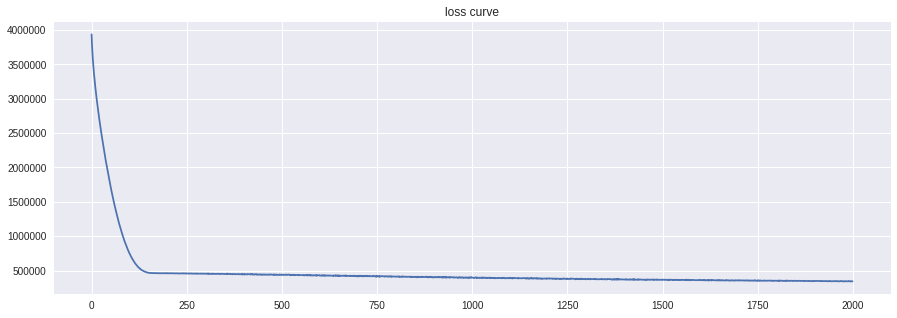

CPU times: user 6min 35s, sys: 31.9 s, total: 7min 7s
Wall time: 2min 3s


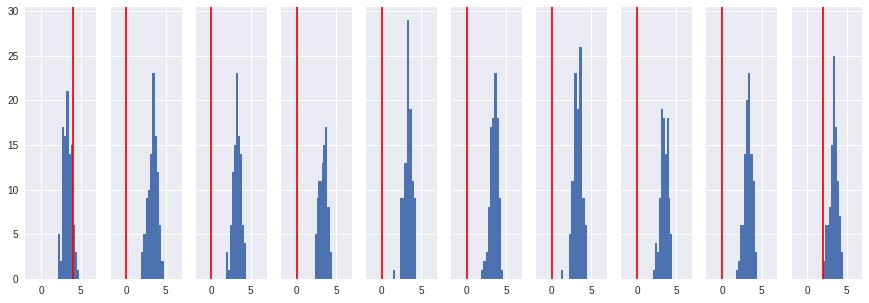

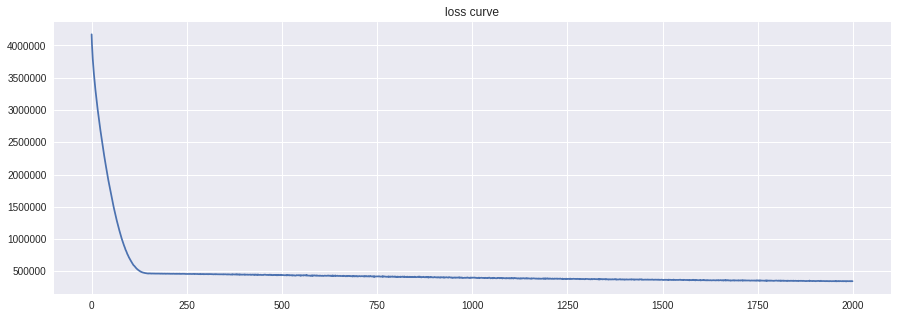

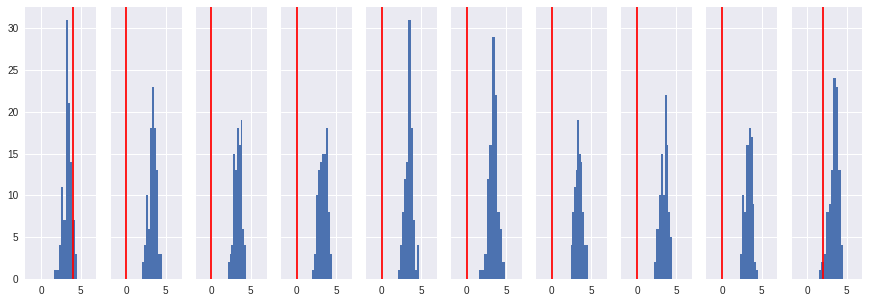

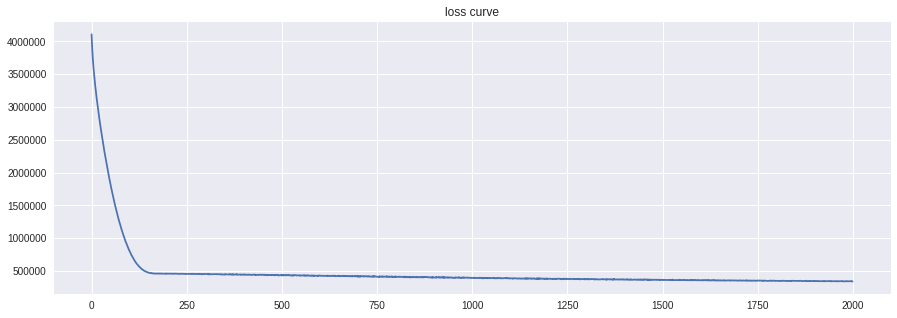

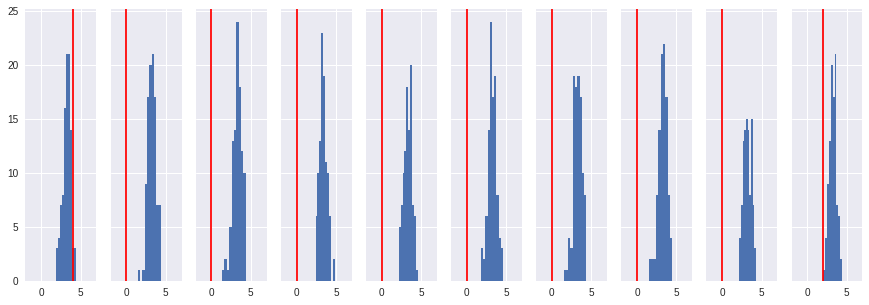

In [7]:
model = SVI_NNMF(R_)
model.inference.initialize(optimizer=tf.train.RMSPropOptimizer(0.0005))
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    %time model.train(mask_, sess)
    samples = model.sample_user_ratings(1, 100, sess)
    plot_R(samples, R_[1,:])
    
    mask_[1,0]=1
    model.train(mask_, sess)
    samples = model.sample_user_ratings(1, 100, sess)
    plot_R(samples, R_[1,:])
    
    mask_[1,4]=1
    model.train(mask_, sess)
    samples = model.sample_user_ratings(1, 100, sess)
    plot_R(samples, R_[1,:])